# Demo chương trình phân tích  EDA ( Exploratory Data Analysis) sử dụng dữ liệu điểm thi THPT quốc gia
# Chuẩn bị chương trình và load dữ liệu.

## Giới thiệu qua về kỳ thi THPT quốc gia.
Kỳ thi Trung học Phổ thông Quốc gia (viết tắt: kỳ thi THPT quốc gia hoặc THPTQG) là một sự kiện của ngành giáo dục Việt Nam, được bắt đầu tổ chức vào năm 2015.Được gộp lại từ hai kỳ thi là Kỳ thi tốt nghiệp trung học phổ thông và Kỳ thi tuyển sinh
đại học và cao đẳng, kỳ thi này xét cho thí sinh hai nguyện vọng: tốt nghiệp trung học phổ thông và tuyển sinh đại học, 
cao đẳng, nhằm giảm bớt tình trạng luyện thi, học tủ, học lệch và giảm bớt chi phí.

## Hình thức thi, cách làm bài và tổng quan đề thi
Thông thường, các môn Toán, Ngữ văn, Lịch sử và Địa lý thi theo hình thức tự luận, các môn Vật lý, Hóa học, Sinh học thi theo
hình thức trắc nghiệm. Với môn Ngoại ngữ, có năm chỉ làm trắc nghiệm, có năm thêm phần tự luận (viết). Với phần tự luận, thí sinh phải làm bài vào tờ giấy thi và trắc nghiệm làm vào phiếu trả lời trắc nghiệm. Tùy từng năm mà hình thức thi có thể thay đổi.

## Một số lưu ý những năm gần đây.
Từ năm 2017, các môn Toán, Khoa học tự nhiên (Vật lý, Hóa học, Sinh học), Khoa học xã hội (Lịch sử, Địa lý, Giáo dục công dân),
Ngoại ngữ thi theo hình thức trắc nghiệm, môn Ngữ văn thi theo hình thức tự luận. Như vậy từ năm 2017 tới nay cách sĩ tử có thể lựa chọn hình thức thi theo dạng tổ hợp như Khoa học tự nhiên hoặc Khoa học xã hội.

In [1]:
import os
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_2019 = pd.read_csv('diemthi2019.csv')
data_2019 = data_2019.drop(labels = 'Unnamed: 0',axis = 1)
data_2019 = data_2019.drop(labels = 'Ma_mon_ngoai_ngu',axis = 1)
a = np.full(len(data_2019),2019)
x = pd.DataFrame({'Year':a})
data_2019 = pd.concat([data_2019,x],axis = 1)
swap_list = ["sbd","Toan","Van","Li",'Hoa','Sinh','Su','Dia','GDCD','Ngoai_ngu','Year']
data_2019 = data_2019.reindex(columns=swap_list)
data_2019.columns = ['SBD','Toán','Văn','Lý','Hoá','Sinh','Lịch Sử','Địa Lý','GDCD','Ngoại Ngữ','Year']
data_2019.head()

,SBD,Toán,Văn,Lý,Hoá,Sinh,Lịch Sử,Địa Lý,GDCD,Ngoại Ngữ,Year
0,24008611,8.2,8.00,NaN,NaN,NaN,8.25,7.75,8.75,7.6,2019
1,51000032,8.6,6.17,8.25,4.5,6.0,NaN,NaN,NaN,8.0,2019
2,51000005,5.2,4.75,NaN,NaN,NaN,4.00,4.25,5.75,NaN,2019
3,51000021,4.4,4.50,NaN,NaN,NaN,2.25,4.75,5.00,NaN,2019
4,51000013,5.8,6.00,NaN,NaN,NaN,7.75,8.25,7.50,4.4,2019


In [3]:
df_2020_2021 = pd.read_csv('./diem_thi_2020_2021.csv')
df_2020_2021 = df_2020_2021[['SBD', 'Toán', 'Văn', 'Ngoại Ngữ', 'Lý', 'Hoá', 'Sinh','Lịch Sử', 'Địa Lý', 'GDCD', 'Year', 'code', 'province']]
df_2020_2021.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_15096\156907452.py:1: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2020_2021 = pd.read_csv('./diem_thi_2020_2021.csv')


,SBD,Toán,Văn,Ngoại Ngữ,Lý,Hoá,Sinh,Lịch Sử,Địa Lý,GDCD,Year,code,province
0,18014547,6.4,6.75,4.2,NaN,NaN,NaN,4.75,7.00,6.50,2020,18,Bắc Giang
1,18014530,7.6,6.00,2.8,NaN,NaN,NaN,3.75,7.75,7.75,2020,18,Bắc Giang
2,18014521,4.8,4.75,NaN,NaN,NaN,NaN,4.00,6.50,NaN,2020,18,Bắc Giang
3,18014517,8.0,7.00,5.8,NaN,NaN,NaN,8.25,8.00,9.50,2020,18,Bắc Giang
4,18014523,8.2,6.50,4.0,8.0,8.5,5.0,NaN,NaN,NaN,2020,18,Bắc Giang


In [4]:
df_2022 = pd.read_csv('./diem_thi_thpt_2022.csv')
df_2022.head()

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd
0,1000001,3.6,5.00,4.0,NaN,NaN,NaN,2.75,6.0,8.75
1,1000002,8.4,6.75,7.6,NaN,NaN,NaN,8.50,7.5,8.25
2,1000003,5.8,7.50,5.0,NaN,NaN,NaN,7.25,5.5,8.75
3,1000004,7.4,7.50,8.6,NaN,NaN,NaN,7.50,6.5,7.50
4,1000005,7.2,8.50,9.0,NaN,NaN,NaN,8.00,8.5,8.25


In [5]:
a = np.full(len(df_2022),2022)
x = pd.DataFrame({'Year':a})
df_2022 = pd.concat([df_2022,x],axis = 1)

In [6]:
df_2022.head()

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,Year
0,1000001,3.6,5.00,4.0,NaN,NaN,NaN,2.75,6.0,8.75,2022
1,1000002,8.4,6.75,7.6,NaN,NaN,NaN,8.50,7.5,8.25,2022
2,1000003,5.8,7.50,5.0,NaN,NaN,NaN,7.25,5.5,8.75,2022
3,1000004,7.4,7.50,8.6,NaN,NaN,NaN,7.50,6.5,7.50,2022
4,1000005,7.2,8.50,9.0,NaN,NaN,NaN,8.00,8.5,8.25,2022


In [7]:
# Đổi tên cột.

df_2022.columns = ['SBD','Toán','Văn','Lý','Hoá','Sinh','Lịch Sử','Địa Lý','GDCD','Ngoại Ngữ','Year']

# Chuyển đổ tất cả các đối tượng sang kiểu float.
for col in ['Toán', 'Văn', 'Ngoại Ngữ', 'Lý','Hoá', 'Sinh', 'Lịch Sử', 'Địa Lý', 'GDCD']:
    df_2022[col] = df_2022[col].astype(float)

# Đặt năm.
df_2022['Year'] = 2022

# lấy mã tỉnh.
def create_province_code(x):
    if len(str(x)) == 7:
        return '0' + str(x)[0]
    return str(x)[:2]

data_2019['code'] = data_2019['SBD'].apply(create_province_code)
df_2022['code'] = df_2022['SBD'].apply(create_province_code)

In [8]:
import geopandas as gpd
map_df = gpd.read_file('./diaphantinh.geojson')
map_df.head()

,gid,code,ten_tinh,geometry
0,1,AD01,An Giang,"MULTIPOLYGON (((105.11524 10.95566, 105.11463 ..."
1,2,AD01,Bà Rịa -Vũng Tàu,"MULTIPOLYGON (((106.08110 8.57754, 106.08069 8..."
2,3,AD01,Bắc Giang,"MULTIPOLYGON (((106.16542 21.62022, 106.16925 ..."
3,4,AD01,Bắc Kạn,"MULTIPOLYGON (((105.74420 22.73519, 105.74624 ..."
4,5,AD01,Bạc Liêu,"MULTIPOLYGON (((105.32591 9.60004, 105.32755 9..."


In [9]:
# Tạo mã tỉnh
code_provinces = ['51', '52', '18', '11', '60', '19', '56', '37', '44', '43', '47', '61', '55',
                  '06', '04', '40', '63', '62', '48', '50', '38', '05', '24', '01', '30', '21',
                  '03', '64', '23', '22', '41', '54', '36', '07', '42', '10', '08', '49', '25',
                  '29', '27', '45', '15', '39', '31', '34', '35', '17', '32', '59', '14', '46',
                  '26', '12', '28', '33', '53', '02', '58', '09', '57', '16', '13']
                  
mapping = {code_provinces[i]: map_df['ten_tinh'].unique().tolist()[i] for i in range(len(code_provinces))}

In [10]:
# Lập bản đồ tỉnh
df_2022['province'] = df_2022['code'].apply(lambda x: mapping[x])
data_2019['province'] = data_2019['code'].apply(lambda x: mapping[x])
x1 = pd.concat([data_2019,df_2020_2021],axis = 0)
final = pd.concat([x1,df_2022],axis = 0)

In [11]:
final

,SBD,Toán,Văn,Lý,Hoá,Sinh,Lịch Sử,Địa Lý,GDCD,Ngoại Ngữ,Year,code,province
0,24008611,8.2,8.00,NaN,NaN,NaN,8.25,7.75,8.75,7.60,2019,24,Hà Nam
1,51000032,8.6,6.17,8.25,4.5,6.0,NaN,NaN,NaN,8.00,2019,51,An Giang
2,51000005,5.2,4.75,NaN,NaN,NaN,4.00,4.25,5.75,NaN,2019,51,An Giang
3,51000021,4.4,4.50,NaN,NaN,NaN,2.25,4.75,5.00,NaN,2019,51,An Giang
4,51000013,5.8,6.00,NaN,NaN,NaN,7.75,8.25,7.50,4.40,2019,51,An Giang
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995436,64006584,8.4,6.75,4.60,NaN,NaN,NaN,6.50,6.75,9.00,2022,64,Hậu Giang
995437,64006585,5.6,6.50,2.80,NaN,NaN,NaN,6.25,6.75,8.50,2022,64,Hậu Giang
995438,64006586,5.8,6.00,6.60,NaN,NaN,NaN,7.25,8.00,8.00,2022,64,Hậu Giang
995439,64006587,7.6,6.75,7.00,NaN,NaN,NaN,8.75,7.25,9.75,2022,64,Hậu Giang


In [12]:
# lưu file
final.to_csv('./final_data.csv', index=False)

In [13]:
df = pd.read_csv('./final_data.csv')
df

,SBD,Toán,Văn,Lý,Hoá,Sinh,Lịch Sử,Địa Lý,GDCD,Ngoại Ngữ,Year,code,province
0,24008611,8.2,8.00,NaN,NaN,NaN,8.25,7.75,8.75,7.60,2019,24,Hà Nam
1,51000032,8.6,6.17,8.25,4.5,6.0,NaN,NaN,NaN,8.00,2019,51,An Giang
2,51000005,5.2,4.75,NaN,NaN,NaN,4.00,4.25,5.75,NaN,2019,51,An Giang
3,51000021,4.4,4.50,NaN,NaN,NaN,2.25,4.75,5.00,NaN,2019,51,An Giang
4,51000013,5.8,6.00,NaN,NaN,NaN,7.75,8.25,7.50,4.40,2019,51,An Giang
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3665164,64006584,8.4,6.75,4.60,NaN,NaN,NaN,6.50,6.75,9.00,2022,64,Hậu Giang
3665165,64006585,5.6,6.50,2.80,NaN,NaN,NaN,6.25,6.75,8.50,2022,64,Hậu Giang
3665166,64006586,5.8,6.00,6.60,NaN,NaN,NaN,7.25,8.00,8.00,2022,64,Hậu Giang
3665167,64006587,7.6,6.75,7.00,NaN,NaN,NaN,8.75,7.25,9.75,2022,64,Hậu Giang


In [14]:
df.columns = ['SBD', 'Toan', 'Van', 'Ngoai_ngu', 'Ly', 'Hoa',
              'Sinh', 'Lich_su', 'Dia_ly', 'GDCD', 'Year', 'code', 'province']

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df['SBD']

0          24008611
1          51000032
2          51000005
3          51000021
4          51000013
             ...   
3665164    64006584
3665165    64006585
3665166    64006586
3665167    64006587
3665168    64006588
Name: SBD, Length: 3660578, dtype: int64

In [17]:
df['Toan']

0          8.2
1          8.6
2          5.2
3          4.4
4          5.8
          ... 
3665164    8.4
3665165    5.6
3665166    5.8
3665167    7.6
3665168    6.6
Name: Toan, Length: 3660578, dtype: float64

In [18]:
df['Van']

0          8.00
1          6.17
2          4.75
3          4.50
4          6.00
           ... 
3665164    6.75
3665165    6.50
3665166    6.00
3665167    6.75
3665168    4.50
Name: Van, Length: 3660578, dtype: float64

In [19]:
df['Ngoai_ngu']

0           NaN
1          8.25
2           NaN
3           NaN
4           NaN
           ... 
3665164    4.60
3665165    2.80
3665166    6.60
3665167    7.00
3665168    3.20
Name: Ngoai_ngu, Length: 3660578, dtype: float64

In [20]:
df['Ly']

0          NaN
1          4.5
2          NaN
3          NaN
4          NaN
          ... 
3665164    NaN
3665165    NaN
3665166    NaN
3665167    NaN
3665168    NaN
Name: Ly, Length: 3660578, dtype: float64

In [21]:
df['Ly'].isnull().sum()

2398974

In [22]:
df['Lich_su']

0          7.75
1           NaN
2          4.25
3          4.75
4          8.25
           ... 
3665164    6.50
3665165    6.25
3665166    7.25
3665167    8.75
3665168    3.00
Name: Lich_su, Length: 3660578, dtype: float64

In [23]:
df['Lich_su'].isnull().sum()

1284177

## So sánh biểu đồ giữa bốn năm2019, 2020, 2021 và 2022 

<AxesSubplot:xlabel='Toan', ylabel='Density'>

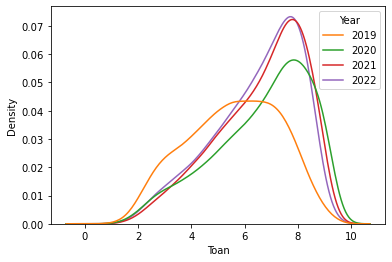

In [24]:
sns.kdeplot(data=df, x='Toan', hue='Year', bw_adjust=2, palette=["C1", "C2", "C3", "C4"])

<AxesSubplot:xlabel='Van', ylabel='Density'>

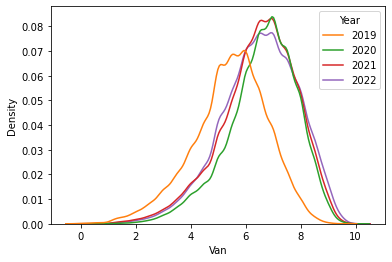

In [25]:
sns.kdeplot(data=df, x='Van', hue='Year', bw_adjust=2, palette=["C1", "C2", "C3", "C4"])

<AxesSubplot:xlabel='Ly', ylabel='Density'>

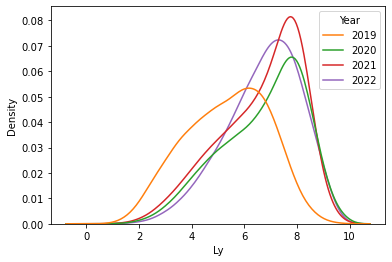

In [26]:
sns.kdeplot(data=df, x='Ly', hue='Year', bw_adjust=2, palette=["C1", "C2", "C3", "C4"])

<AxesSubplot:xlabel='Hoa', ylabel='Density'>

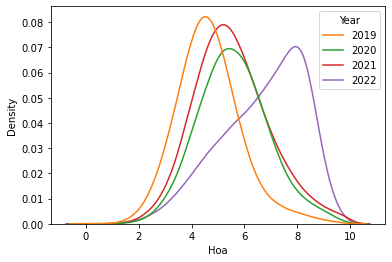

In [27]:
sns.kdeplot(data=df, x='Hoa', hue='Year', bw_adjust=2, palette=["C1", "C2", "C3", "C4"])

<AxesSubplot:xlabel='Lich_su', ylabel='Density'>

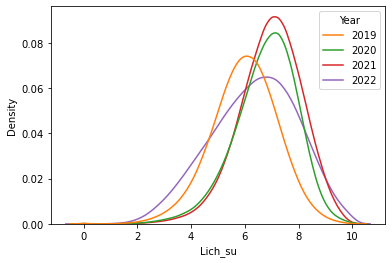

In [135]:
sns.kdeplot(data=df, x='Lich_su', hue='Year', bw_adjust=2, palette=["C1", "C2", "C3", "C4"])

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0, 0.5, 'Toan'),
  Text(0, 1.5, 'Van'),
  Text(0, 2.5, 'Ngoai_ngu'),
  Text(0, 3.5, 'Ly'),
  Text(0, 4.5, 'Hoa'),
  Text(0, 5.5, 'Sinh'),
  Text(0, 6.5, 'Lich_su'),
  Text(0, 7.5, 'Dia_ly'),
  Text(0, 8.5, 'GDCD')])

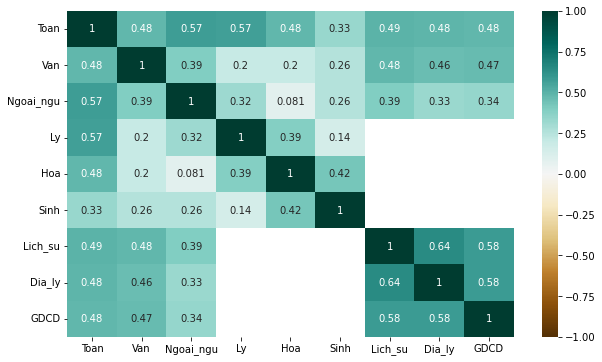

In [136]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[df['Year'] == 2022][['Toan', 'Van', 'Ngoai_ngu', 'Ly', 'Hoa',
       'Sinh', 'Lich_su', 'Dia_ly', 'GDCD']].corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.yticks(rotation=0)

## Bản Đồ

In [137]:
df_2022 = df[df['Year'] == 2022]

In [138]:
import geopandas as gpd
map_df = gpd.read_file('./diaphantinh.geojson')
map_df.head()

,gid,code,ten_tinh,geometry
0,1,AD01,An Giang,"MULTIPOLYGON (((105.11524 10.95566, 105.11463 ..."
1,2,AD01,Bà Rịa -Vũng Tàu,"MULTIPOLYGON (((106.08110 8.57754, 106.08069 8..."
2,3,AD01,Bắc Giang,"MULTIPOLYGON (((106.16542 21.62022, 106.16925 ..."
3,4,AD01,Bắc Kạn,"MULTIPOLYGON (((105.74420 22.73519, 105.74624 ..."
4,5,AD01,Bạc Liêu,"MULTIPOLYGON (((105.32591 9.60004, 105.32755 9..."


In [139]:
# Fix some typo errors
map_df.loc[44, 'ten_tinh'] = 'Quảng Bình'
map_df.loc[31, 'ten_tinh'] = 'Kiên Giang'
map_df.loc[12, 'ten_tinh'] = 'Cần Thơ'

In [140]:
def merge_df(subject_name, map_df, df_2022):
    map_df = map_df.merge(df_2022.groupby('province')[subject_name].mean(), how='left', left_on='ten_tinh', right_on='province')
    map_df.rename(columns={subject_name: subject_name + '_avg'}, inplace=True)
    map_df = map_df.merge(df_2022.groupby('province')[subject_name].std(), how='left', left_on='ten_tinh', right_on='province')
    map_df.rename(columns={subject_name: subject_name + '_std'}, inplace=True)
    map_df = map_df.merge(df_2022.groupby('province')[subject_name].apply(lambda x: (x >= 9).sum()/len(x)), how='left', left_on='ten_tinh', right_on='province')
    map_df.rename(columns={subject_name: subject_name + '_>=9'}, inplace=True)
    return map_df

In [141]:
for subject_name in ['Toan', 'Van', 'Ngoai_ngu', 'Lich_su', 'GDCD']:
    map_df = merge_df(subject_name, map_df, df_2022)

map_df.head()

,gid,code,ten_tinh,geometry,Toan_avg,Toan_std,Toan_>=9,Van_avg,Van_std,Van_>=9,Ngoai_ngu_avg,Ngoai_ngu_std,Ngoai_ngu_>=9,Lich_su_avg,Lich_su_std,Lich_su_>=9,GDCD_avg,GDCD_std,GDCD_>=9
0,1,AD01,An Giang,"MULTIPOLYGON (((105.11524 10.95566, 105.11463 ...",6.532995,1.413811,0.008830,6.832086,1.218361,0.026704,5.214294,1.572482,0.020620,6.667118,1.523206,0.035964,8.332156,0.922014,0.175622
1,2,AD01,Bà Rịa -Vũng Tàu,"MULTIPOLYGON (((106.08110 8.57754, 106.08069 8...",6.728949,1.434275,0.015244,6.483615,1.222594,0.007819,5.837798,1.919194,0.053629,6.041582,1.643661,0.013980,8.054292,1.028526,0.081984
2,3,AD01,Bắc Giang,"MULTIPOLYGON (((106.16542 21.62022, 106.16925 ...",6.469325,1.651402,0.022478,6.821436,1.266226,0.024279,5.072878,1.740398,0.023160,6.557756,1.544728,0.039556,8.238795,0.972752,0.169367
3,4,AD01,Bắc Kạn,"MULTIPOLYGON (((105.74420 22.73519, 105.74624 ...",5.551524,1.667308,0.007206,6.270404,1.429006,0.026859,4.205261,1.655999,0.011464,6.560808,1.610752,0.065509,8.095730,1.023468,0.174910
4,5,AD01,Bạc Liêu,"MULTIPOLYGON (((105.32591 9.60004, 105.32755 9...",6.678048,1.341956,0.014658,6.915358,1.010324,0.012163,5.037847,1.608973,0.017153,6.654777,1.534446,0.038048,8.292640,0.882284,0.154218


In [142]:
def draw_map(variable):
    # create figure and axes for Matplotlib
    fig, ax = plt.subplots(1, figsize=(50, 17))

    # remove the axis
    ax.axis('off')

    # create map
    if 'avg' in variable:
        cmap = 'Greens'
    elif '>=9' in variable:
        cmap = 'Reds'
    else:
        cmap = 'Blues'
    map_df.plot(column=variable, cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8')

    # Add Labels
    map_df['coords'] = map_df['geometry'].apply(lambda x: x.representative_point().coords[:])
    map_df['coords'] = [coords[0] for coords in map_df['coords']]
    map_df.sort_values(by=[variable], ascending=False, inplace=True)
    for idx, row in map_df[:15].iterrows():
         plt.annotate(text=row['ten_tinh'], xy=row['coords'],horizontalalignment='center')

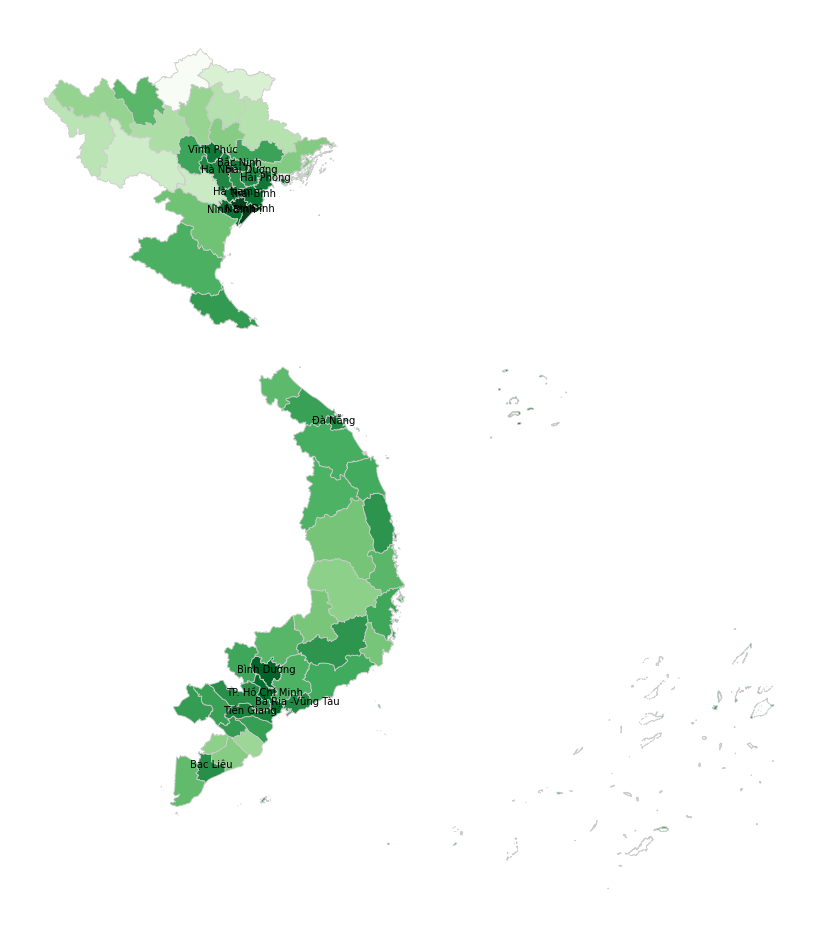

In [143]:
draw_map('Toan_avg')

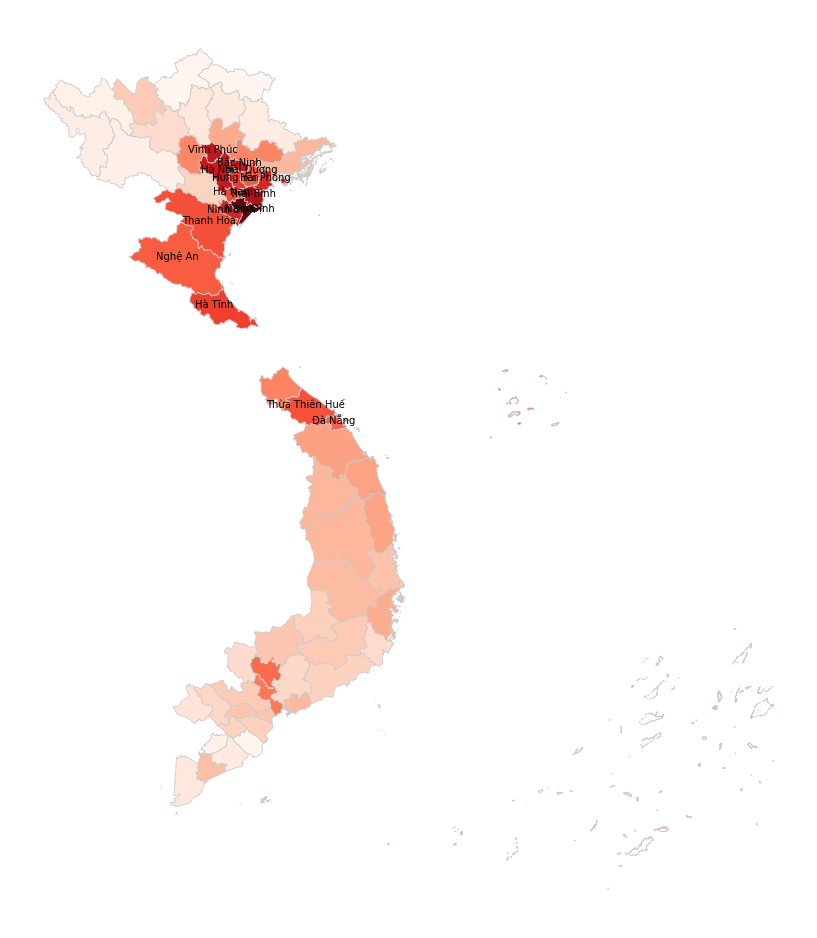

In [144]:
draw_map('Toan_>=9')

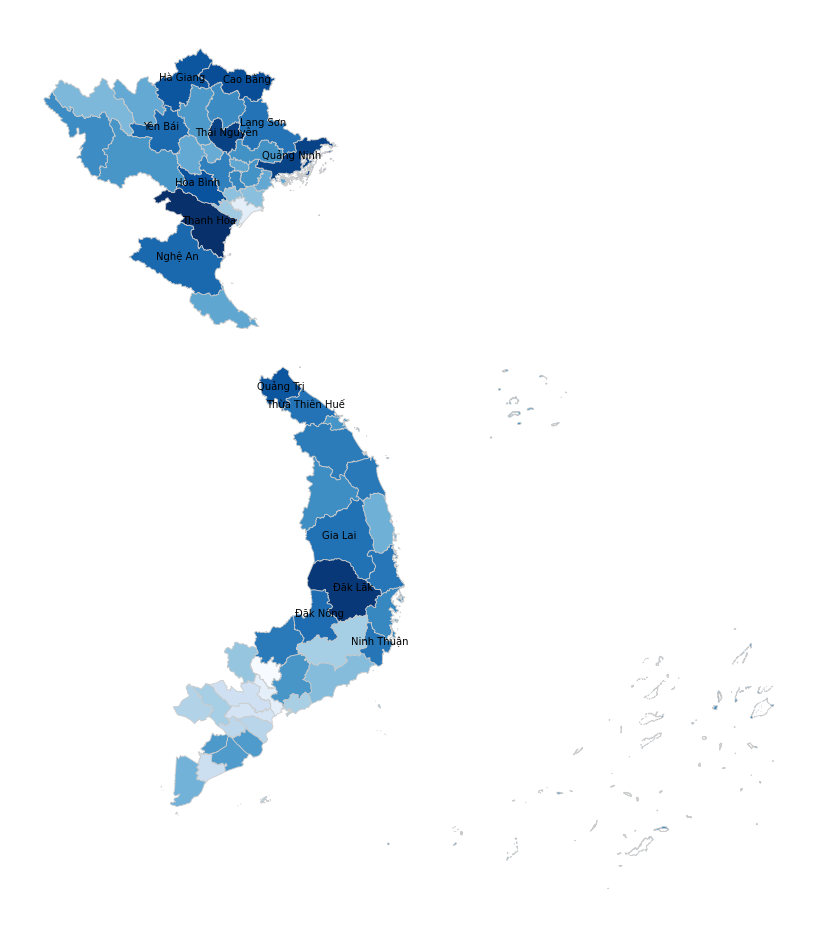

In [145]:
draw_map('Toan_std')

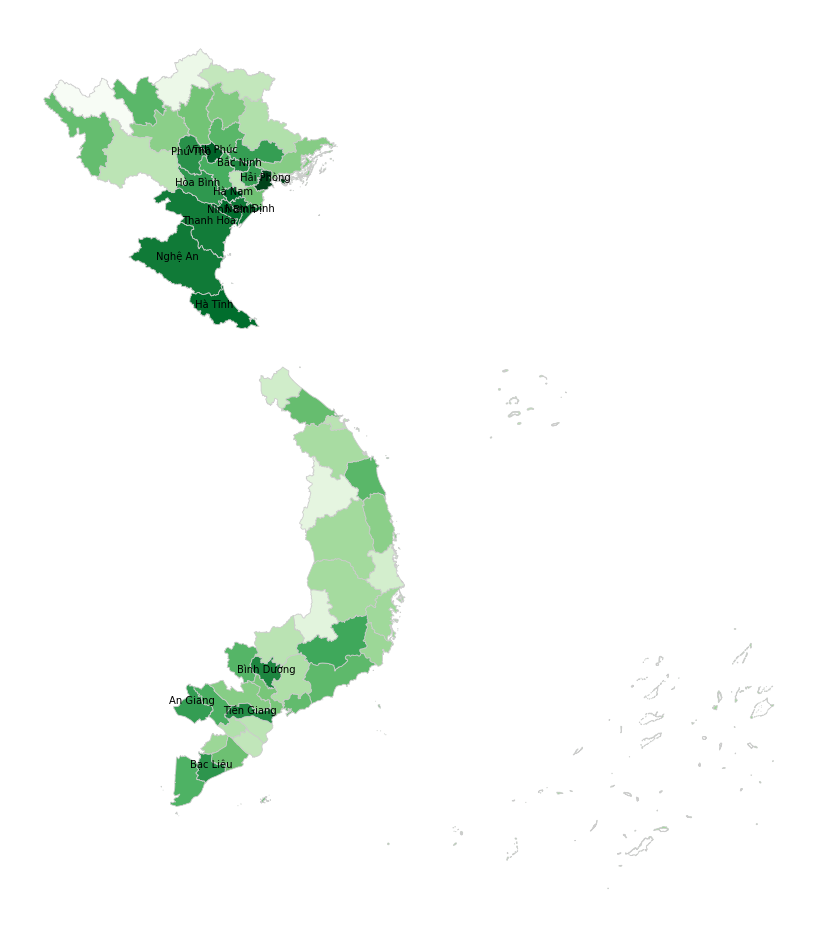

In [146]:
draw_map('Van_avg')

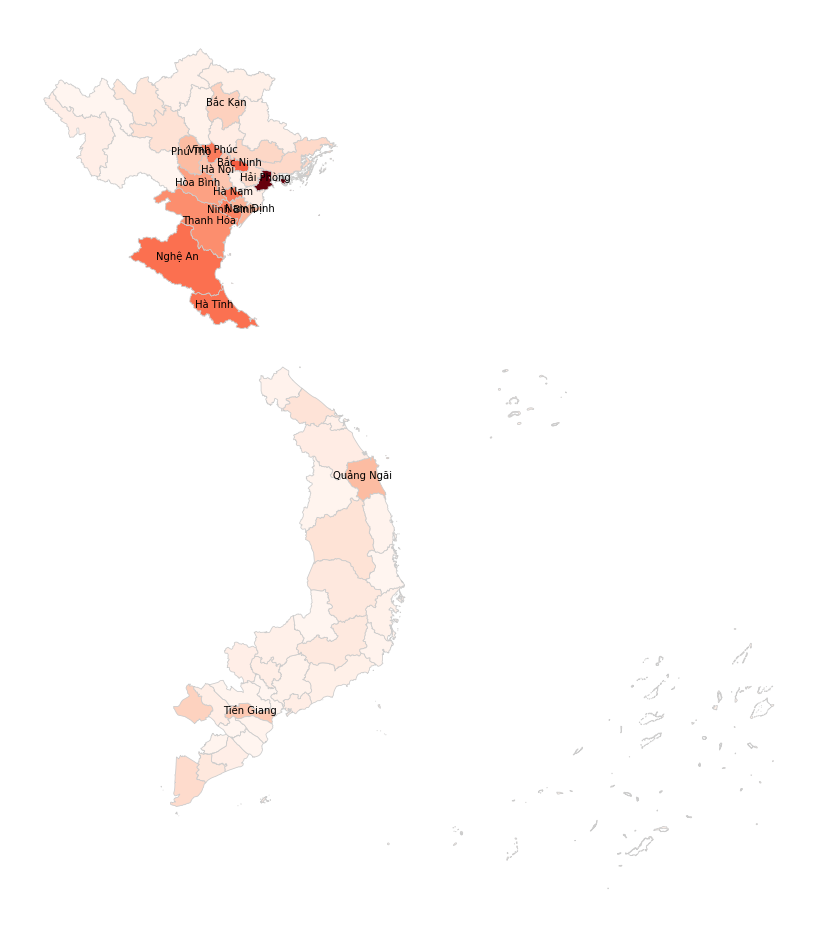

In [147]:
draw_map('Van_>=9')

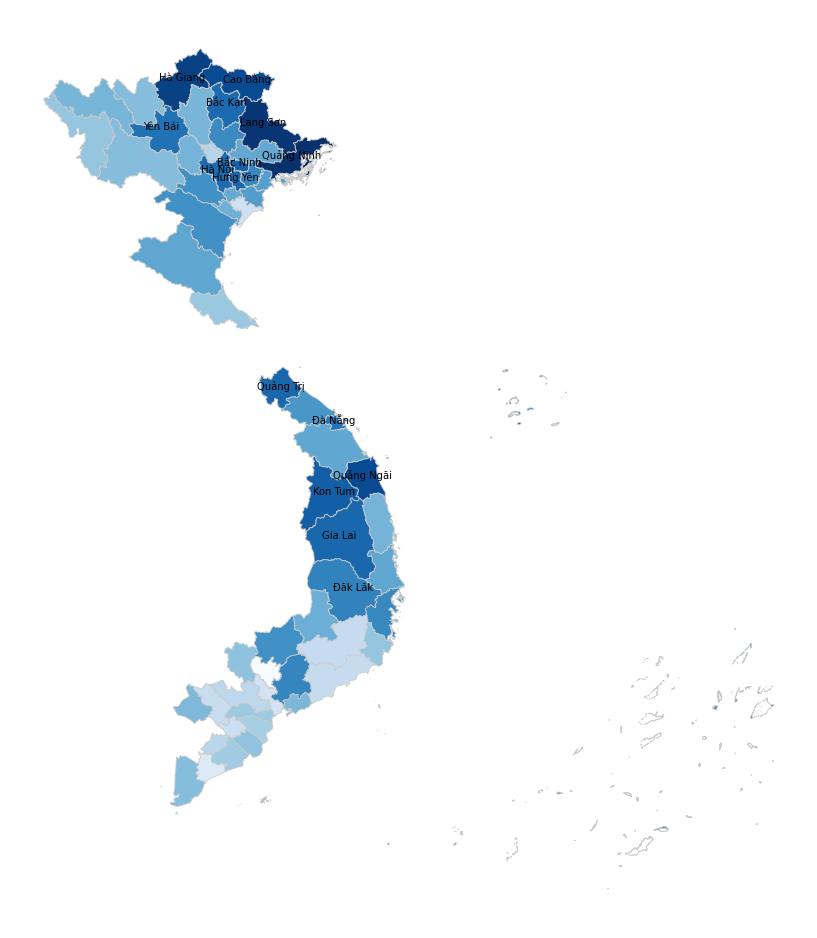

In [148]:
draw_map('Van_std')

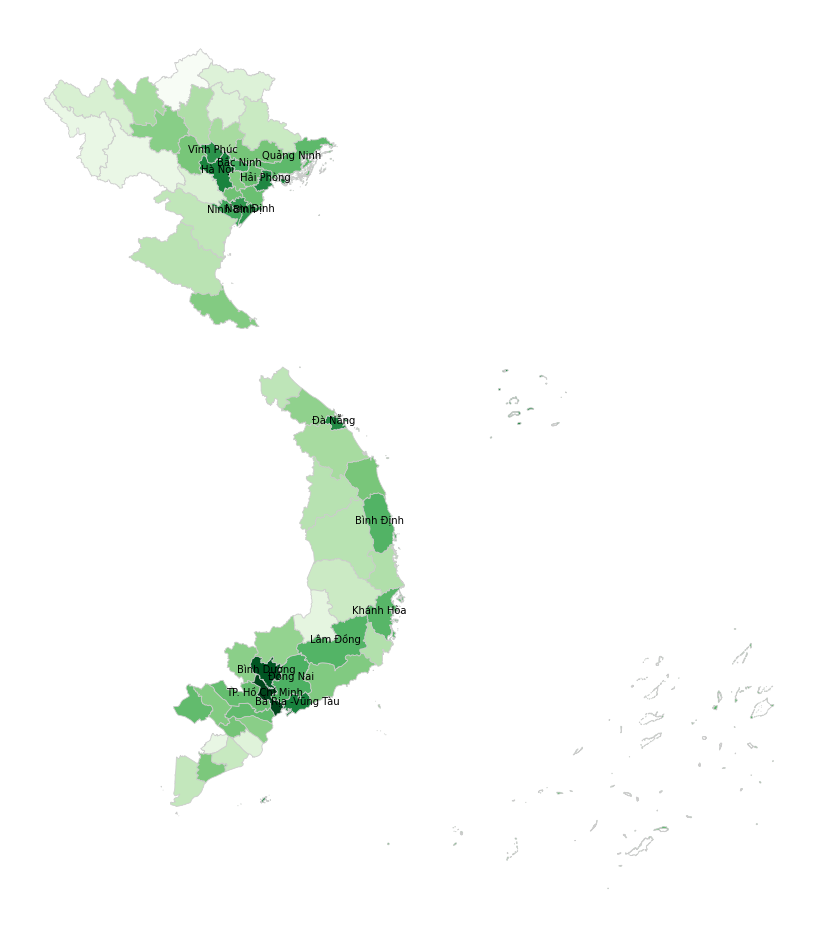

In [149]:
draw_map('Ngoai_ngu_avg')

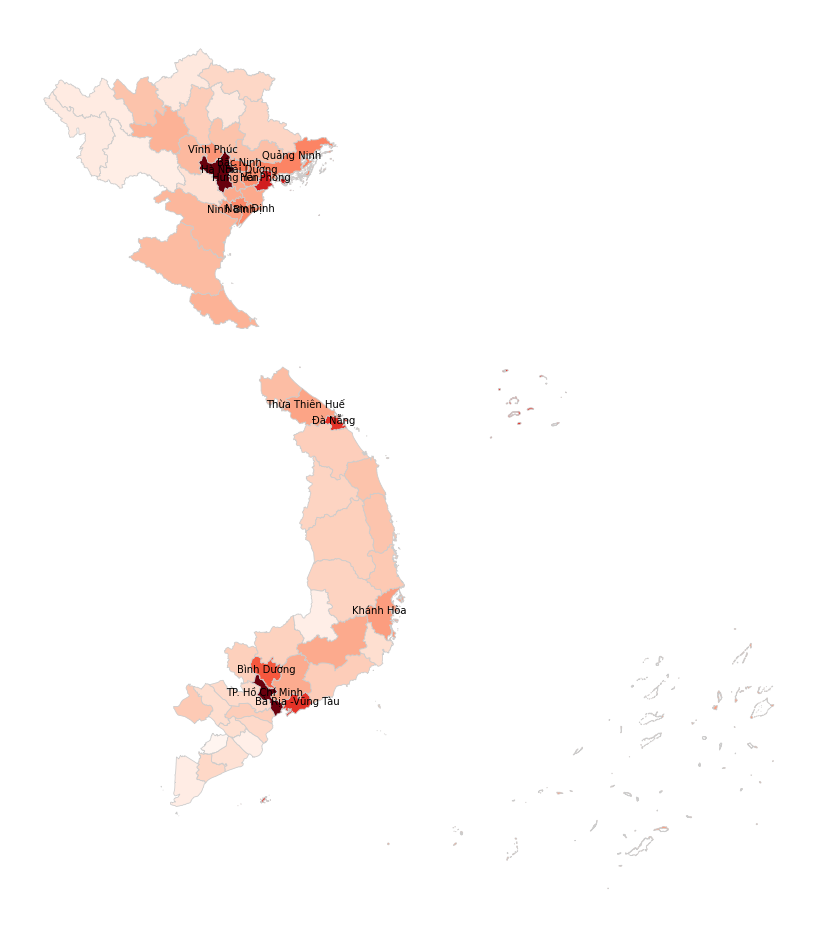

In [150]:
draw_map('Ngoai_ngu_>=9')

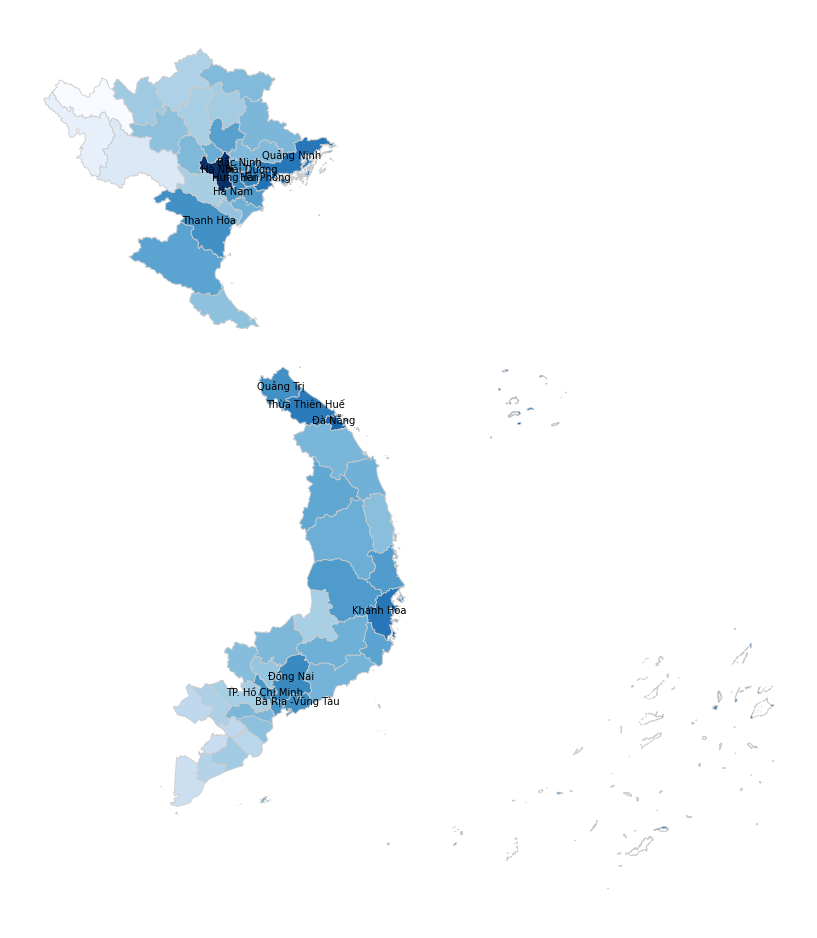

In [151]:
draw_map('Ngoai_ngu_std')

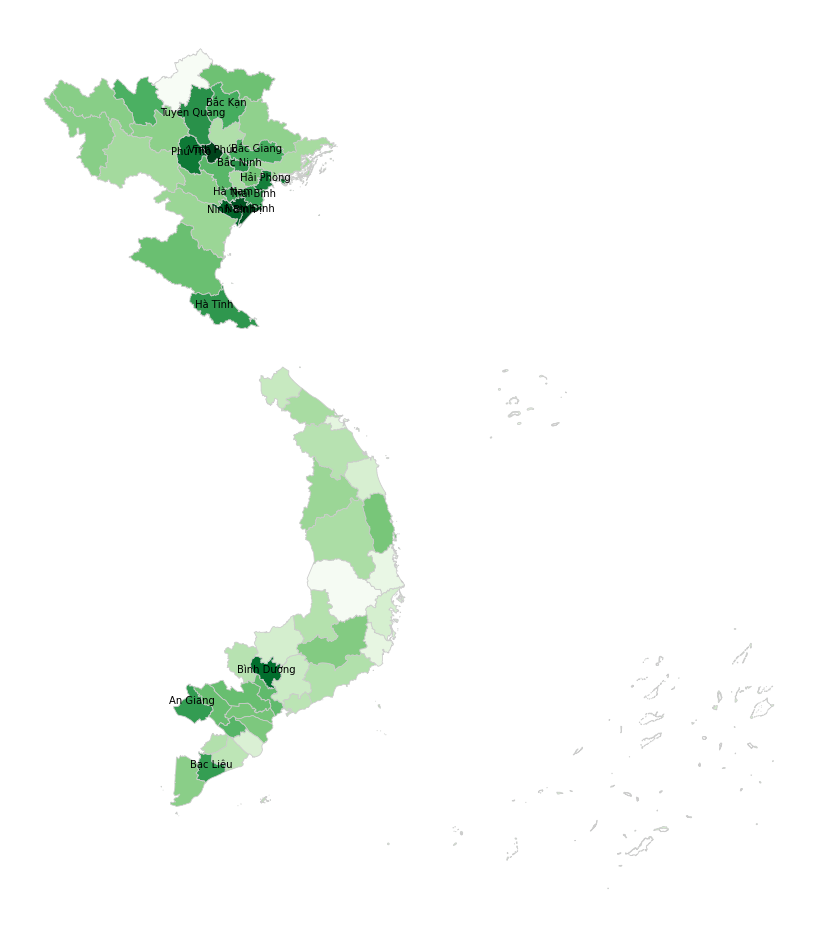

In [152]:
draw_map('Lich_su_avg')

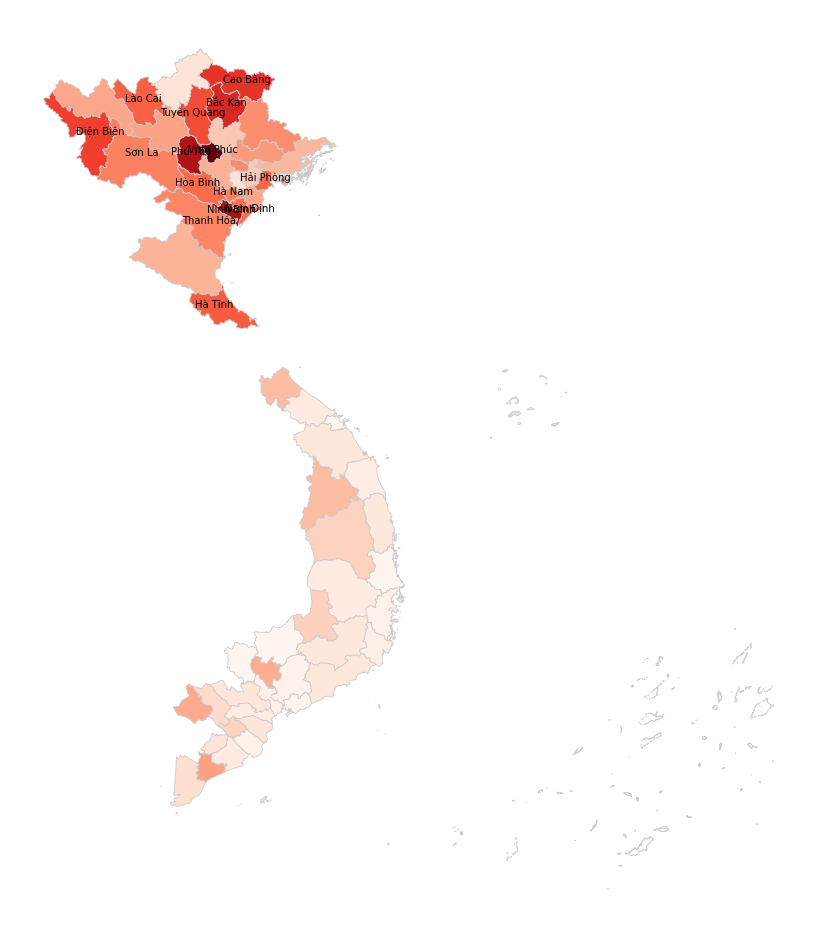

In [153]:
draw_map('Lich_su_>=9')

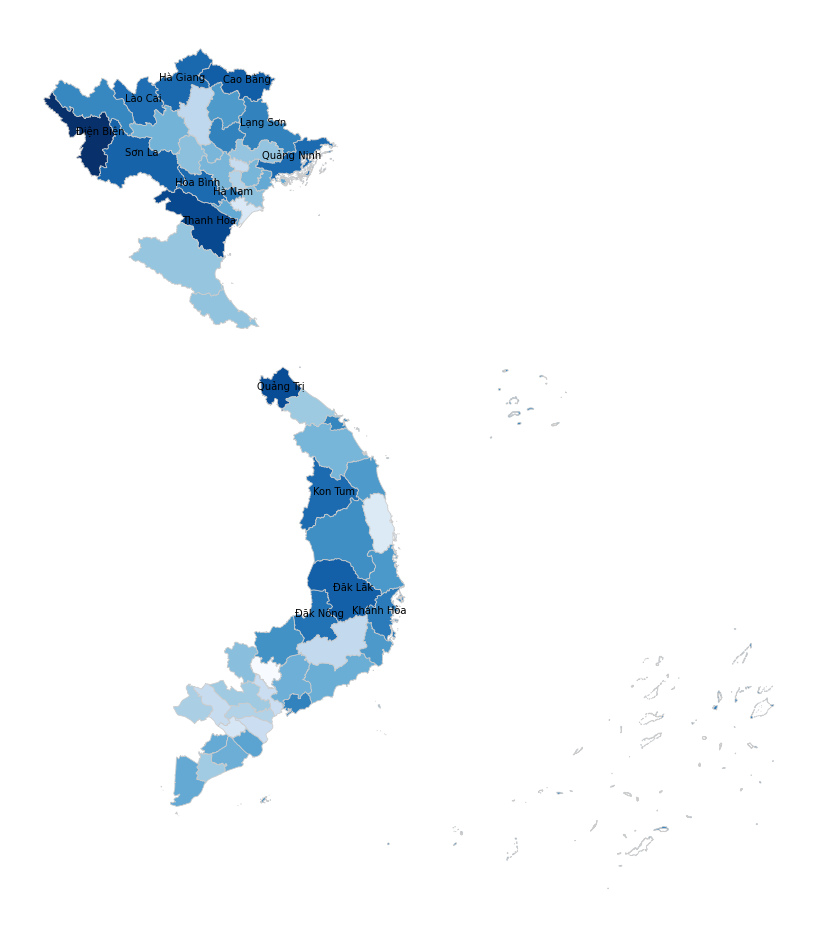

In [154]:
draw_map('Lich_su_std')